In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery-dataset/Sample_Submission.csv
/kaggle/input/food-delivery-dataset/train.csv
/kaggle/input/food-delivery-dataset/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/food-delivery-dataset/train.csv')

In [4]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [5]:
# Checking the data types 
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [6]:
# Checking the null values in a dataset.
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Statistical description
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [9]:
df.replace({"NaN": np.nan}, regex=True, inplace = True)

In [10]:
# After replacing Nan with actual np.nan we will check again all the null values.
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [11]:
# we will replace id column because it is not in use
df.drop('ID',axis=1,inplace=True)

In [12]:
# In time taken column string min will replace and changing its dtype
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)','')
df=df.rename(columns={'Time_taken(min)':'Time_taken'})
df['Time_taken'] =df['Time_taken'].astype(int)

In [13]:
df['Weatherconditions']=df['Weatherconditions'].str.replace('conditions','')

In [14]:
from geopy.distance import geodesic

# Define a function to calculate distance
def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(restaurant_coords, delivery_coords).kilometers

# Apply the function to the DataFrame
df['distance_km'] = df.apply(calculate_distance, axis=1)
print(df)

      Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0        INDORES13DEL02                   37                     4.9   
1        BANGRES18DEL02                   34                     4.5   
2        BANGRES19DEL01                   23                     4.4   
3       COIMBRES13DEL02                   38                     4.7   
4        CHENRES12DEL01                   32                     4.6   
...                  ...                 ...                     ...   
45588     JAPRES04DEL01                   30                     4.8   
45589     AGRRES16DEL01                   21                     4.6   
45590    CHENRES08DEL03                   30                     4.9   
45591   COIMBRES11DEL01                   20                     4.7   
45592  RANCHIRES09DEL02                   23                     4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471       

# Changing types of columns

In [15]:
df['Delivery_person_Age']=df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype(float)

In [16]:
# Converting order_date dtype into datetime
df['Order_Date']=pd.to_datetime(df['Order_Date'])

# Creating three column for day,month and year
df['Order_day']=df['Order_Date'].dt.day
df['Order_month']=df['Order_Date'].dt.month
df['Order_year']=df['Order_Date'].dt.year

In [17]:
# Shifting columns
col = df.pop("Order_day")
df.insert(10,"Order_day",col)

col = df.pop("Order_month")
df.insert(11,"Order_month",col)

col = df.pop("Order_year")
df.insert(12,"Order_year",col)

In [18]:
# Converting time_order dtype into datetime
df['Time_Orderd']=pd.to_datetime(df['Time_Orderd'])

# Creating two new column for hour and minute
df['Hour_order']=df['Time_Orderd'].dt.hour
df['Min_order']=df['Time_Orderd'].dt.minute

In [19]:
# Now Shifting columns
col = df.pop("Hour_order")
df.insert(14,"Hour_order",col)

col = df.pop("Min_order")
df.insert(15,"Min_order",col)

In [20]:
# Converting time_order_picked dtype into datetime
df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'])

# Creating two new column for hour and minute
df['Hour_order_picked']=df['Time_Order_picked'].dt.hour
df['Min_order_picked']=df['Time_Order_picked'].dt.minute

In [21]:
# Now Shifting columns
col = df.pop("Hour_order_picked")
df.insert(17,"Hour_order_picked",col)

col = df.pop("Min_order_picked")
df.insert(18,"Min_order_picked",col)

# Handiling missing values.

In [22]:
df['Delivery_person_Age']= df['Delivery_person_Age'].fillna(df.Delivery_person_Age.median())
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df.Delivery_person_Ratings.median())
df['Time_Orderd']=df['Time_Orderd'].fillna(df.Time_Orderd.mode()[0])
df['Hour_order']=df['Hour_order'].fillna(df.Hour_order.mode()[0])
df['Min_order']=df['Min_order'].fillna(df.Min_order.mode()[0])
df['Weatherconditions']=df['Weatherconditions'].fillna(df.Weatherconditions.mode()[0])
df['Road_traffic_density']=df['Road_traffic_density'].fillna(df.Road_traffic_density.mode()[0])
df['multiple_deliveries']=df['multiple_deliveries'].fillna(df.multiple_deliveries.mode()[0])
df['Festival']=df['Festival'].fillna(df.Festival.mode()[0])
df['City']=df['City'].fillna(df.City.mode()[0])


In [23]:
# Rechecking the null values 
df.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Order_day                      0
Order_month                    0
Order_year                     0
Weatherconditions              0
Hour_order                     0
Min_order                      0
Road_traffic_density           0
Hour_order_picked              0
Min_order_picked               0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken                     0
distance_km                    0
dtype: int64

# EDA

<Axes: xlabel='Delivery_person_Ratings', ylabel='Count'>

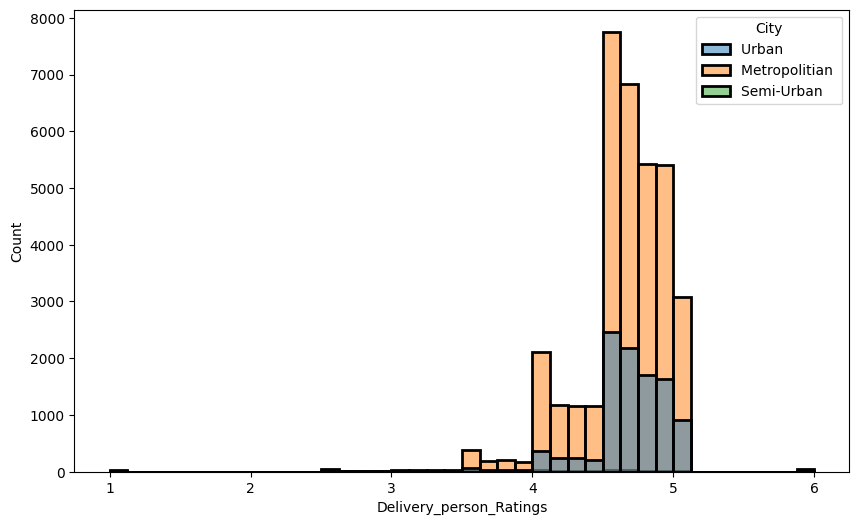

In [24]:
# Histogram of delivery person rating according to cities
plt.figure(figsize=(10,6))
sns.histplot(x=df.Delivery_person_Ratings,hue=df.City,bins=40,linewidth=2)

Text(0.5, 1.0, 'Time taken by vehicle according to order')

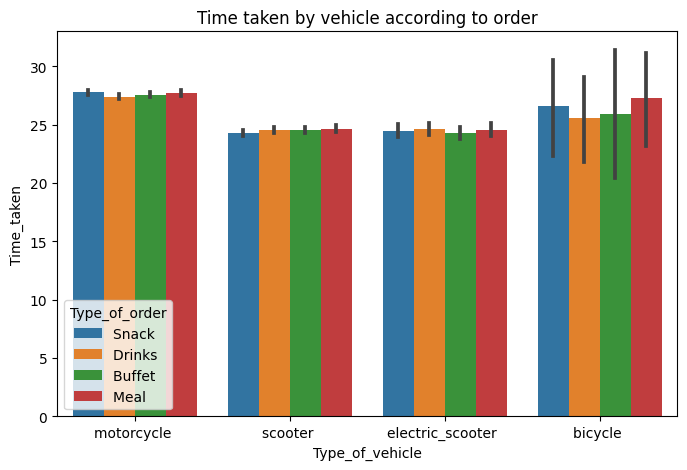

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x=df.Type_of_vehicle,y=df.Time_taken,hue=df.Type_of_order)
plt.title('Time taken by vehicle according to order')

<Axes: xlabel='Time_taken', ylabel='distance_km'>

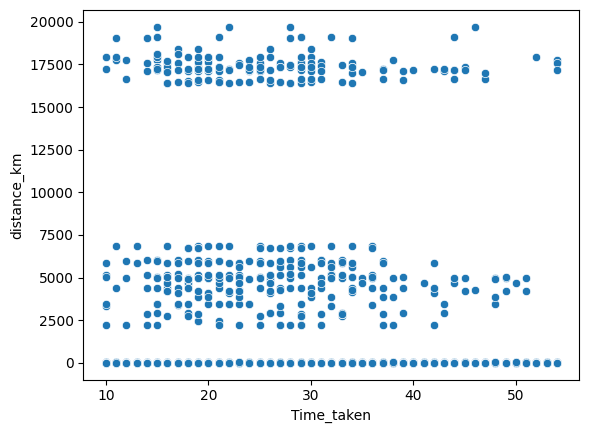

In [26]:
sns.scatterplot(x=df.Time_taken,y=df.distance_km)

Text(0.5, 0, 'Delivery person rating')

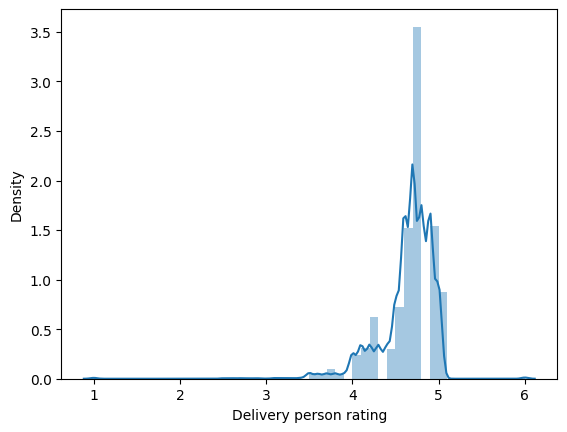

In [27]:
sns.distplot(x=df.Delivery_person_Ratings)
plt.xlabel('Delivery person rating')

<Axes: xlabel='Delivery_person_Age', ylabel='Delivery_person_Ratings'>

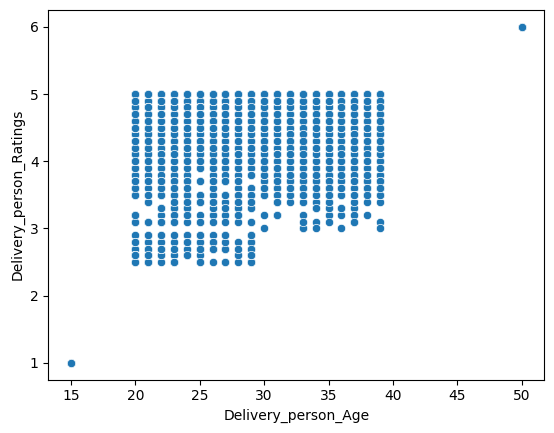

In [28]:
sns.scatterplot(x=df.Delivery_person_Age,y=df.Delivery_person_Ratings)

<Axes: xlabel='Delivery_person_Age', ylabel='Time_taken'>

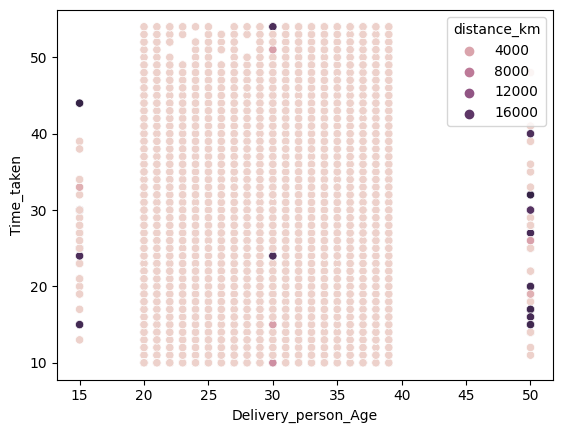

In [29]:
sns.scatterplot(x=df.Delivery_person_Age,y=df.Time_taken,hue=df.distance_km)

<Axes: xlabel='City', ylabel='count'>

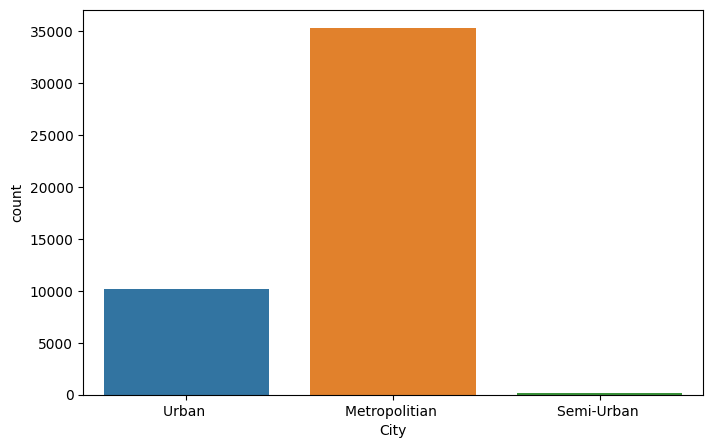

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.City)

* Mostly the higher number of deliveries in Metropolitian city where as the least no of deliveries are in semi urban cities

<Axes: ylabel='Density'>

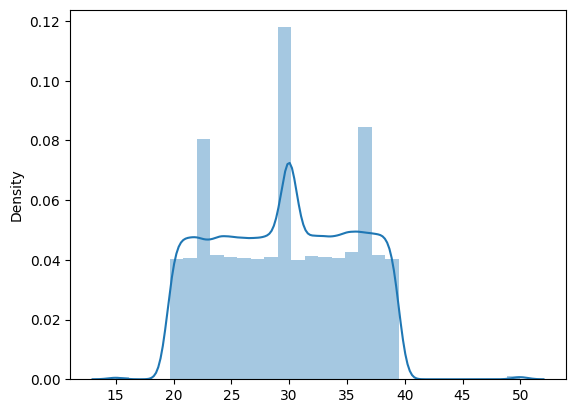

In [31]:
sns.distplot(x=df.Delivery_person_Age,kde=True,bins=30)

Text(0.5, 1.0, 'Time taken by road traffic density')

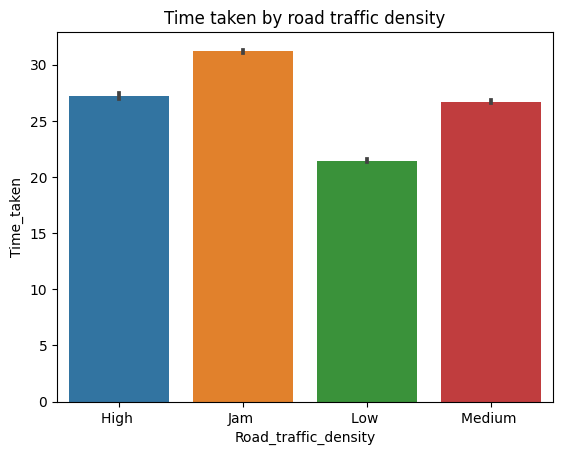

In [32]:
sns.barplot(x=df.Road_traffic_density,y=df.Time_taken)
plt.title('Time taken by road traffic density')

<Axes: xlabel='Weatherconditions', ylabel='count'>

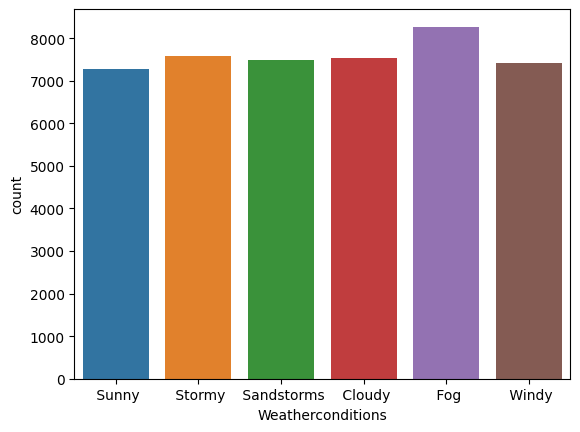

In [33]:
# Weather conditions countplot
sns.countplot(x=df.Weatherconditions)

Text(0.5, 1.0, 'Types of vehicle used for deliveries')

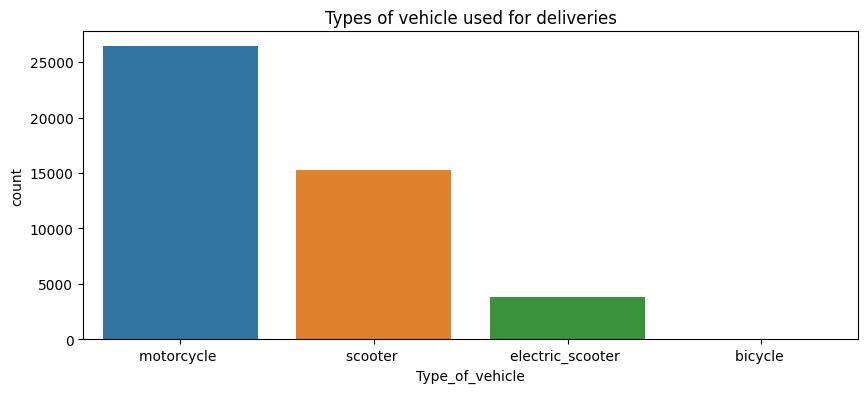

In [34]:
# Countplot for type of vehicle
plt.figure(figsize=(10,4))
sns.countplot(x=df.Type_of_vehicle)
plt.title('Types of vehicle used for deliveries')

* Motorcycle use the most for deliveries 

<Axes: xlabel='multiple_deliveries', ylabel='count'>

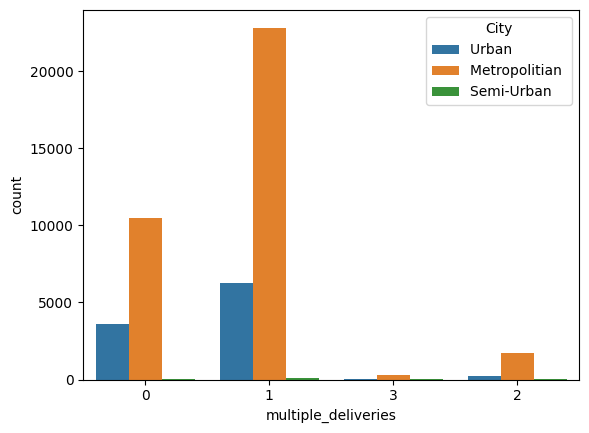

In [35]:
sns.countplot(x=df.multiple_deliveries,hue=df.City)

<Axes: xlabel='Festival', ylabel='count'>

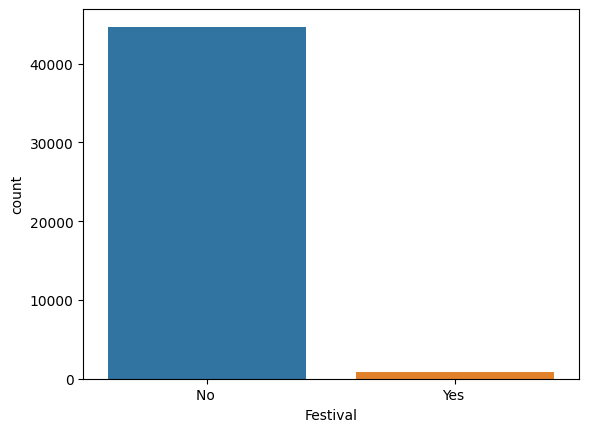

In [36]:
sns.countplot(x=df.Festival)

* Mostly the food was delivered when their is no festival

Text(0.5, 1.0, 'Total No of delivery person id ')

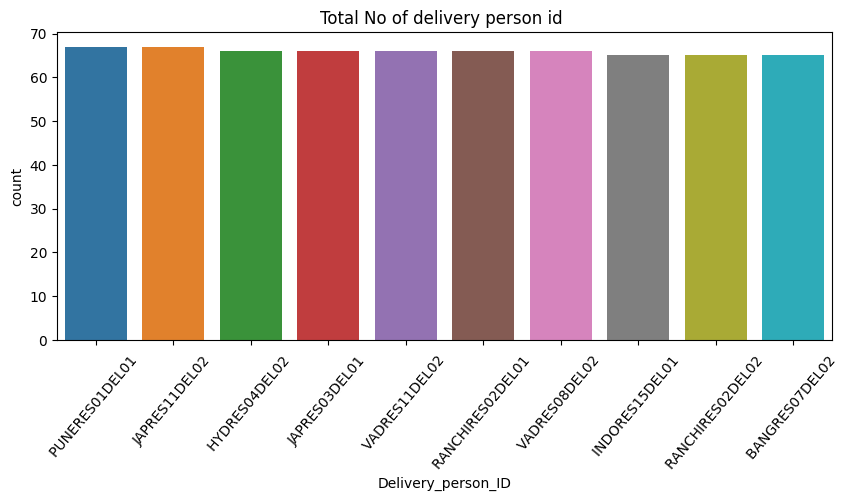

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(x=df.Delivery_person_ID.value_counts().head(10).index,y=df.Delivery_person_ID.value_counts().head(10))
plt.xticks(rotation=50)
plt.title('Total No of delivery person id ')

# Model Building

In [64]:
# After eda our next step is to identify x and y 
x= df.drop(['Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked'],axis=1)
y= df.Time_taken

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [67]:
x_train.shape,x_test.shape

((34194, 23), (11399, 23))

In [68]:
y_train.shape,y_test.shape

((34194,), (11399,))

In [69]:
x_train.select_dtypes(include='object').columns

Index(['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City'],
      dtype='object')

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
oe = OrdinalEncoder()

In [72]:
oe

OrdinalEncoder()

In [73]:
x_train[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']] = oe.fit_transform(x_train[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']])

In [74]:
x_test[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']] = oe.transform(x_test[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']])

In [50]:
# Create StandardScaler 
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [52]:
sc

StandardScaler()

In [53]:
sc.fit(x_train)

StandardScaler()

In [54]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [76]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [77]:
lr

LinearRegression()

In [78]:
dtr

DecisionTreeRegressor()

In [79]:
rfr

RandomForestRegressor()

In [80]:
lr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
lr_pred = lr.predict(x_test)
dtr_pred = dtr.predict(x_test)
rfr_pred = rfr.predict(x_test)

In [82]:
from sklearn.metrics import r2_score

In [83]:
print(r2_score(y_test,lr_pred))
print(r2_score(y_test,dtr_pred))
print(r2_score(y_test,rfr_pred))

1.0
1.0
1.0


In [86]:
lr.score(x_train,y_train)

1.0

In [87]:
lr.score(x_test,y_test)

1.0

In [88]:
dtr.score(x_train,y_train)

1.0

In [89]:
dtr.score(x_test,y_test)

1.0

In [91]:
rfr.score(x_train,y_train)

1.0

In [92]:
rfr.score(x_test,y_test)

1.0